<a href="https://colab.research.google.com/github/srujanay18/VaxxVote/blob/main/2_exploratoryplots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory Plots for VaxxVote

# What we are doing
Analyze the relationship between US presidential party affiliation and vaccination coverage (Rubella, DTP, Measles) and influenza vaccine distribution from 1980 to 2024 by creating a dataset of US presidents and their parties, loading and cleaning vaccination data from "WUENIC_coverage_expanded.csv" and influenza data from "influenza_doses_distributed.csv", and generating line plots with party-colored reference bands.

Load the Packages for Exploratory Plots

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

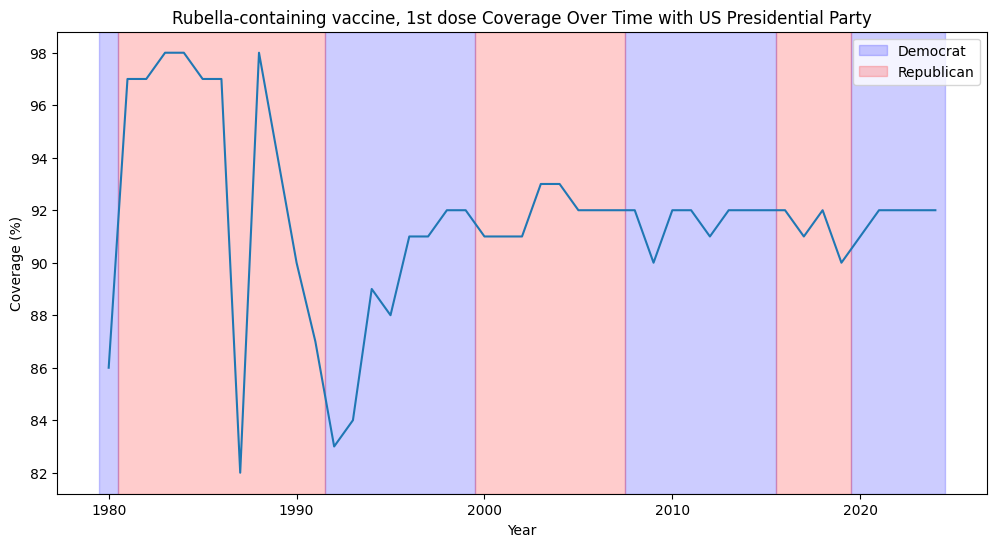

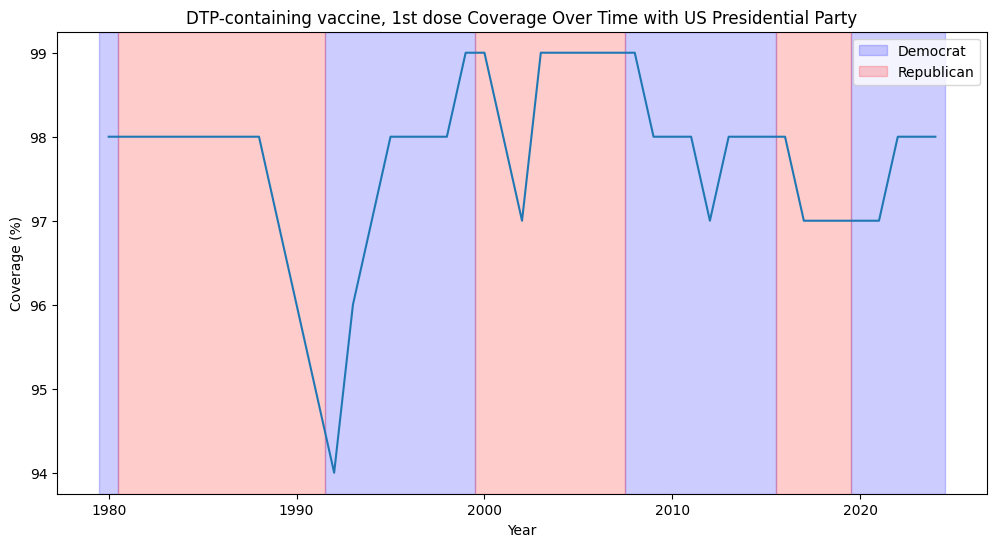

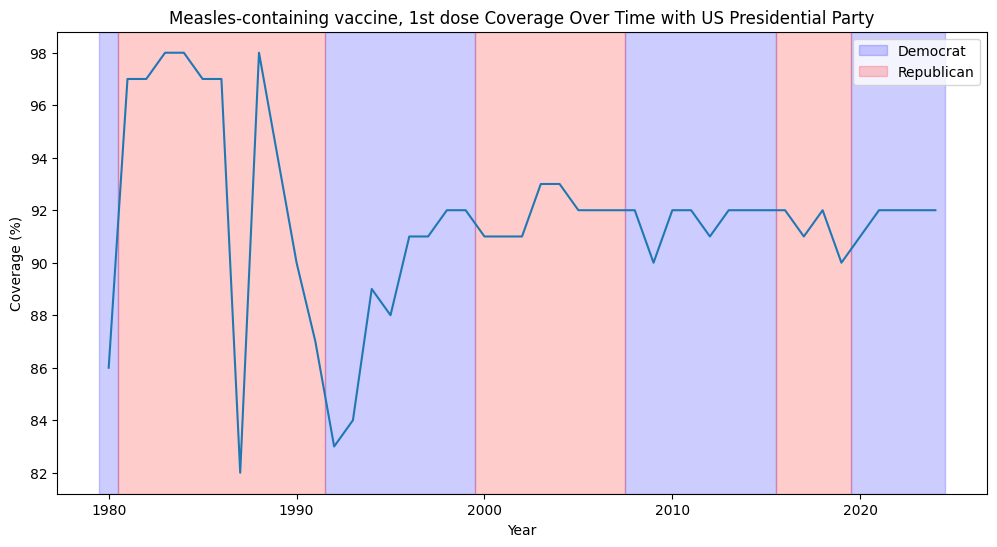

In [13]:
#Load the merged vaccination data

merged_df = pd.read_csv("/content/merged_vaccination_presidents_data.csv")

vaccination_types = merged_df['ANTIGEN_DESCRIPTION'].unique()

for vaccine_type in vaccination_types:
    fig, ax = plt.subplots(figsize=(12, 6))
    filtered_df = merged_df[merged_df['ANTIGEN_DESCRIPTION'] == vaccine_type]

    sns.lineplot(data=filtered_df, x='year', y='COVERAGE', ax=ax)

    # Group consecutive years with the same party
    party_groups = filtered_df.groupby('party')['year'].apply(list).to_dict()

    for party, years in party_groups.items():
        color = 'blue' if party == 'Democrat' else 'red'
        # Sort years to ensure correct plotting order
        years.sort()
        start_year = years[0]
        end_year = years[0]
        for i in range(1, len(years)):
            if years[i] == end_year + 1:
                end_year = years[i]
            else:
                ax.axvspan(start_year - 0.5, end_year + 0.5, color=color, alpha=0.2)
                start_year = years[i]
                end_year = years[i]
        # Plot the last group of years
        ax.axvspan(start_year - 0.5, end_year + 0.5, color=color, alpha=0.2)


    ax.set_title(f'{vaccine_type} Coverage Over Time with US Presidential Party')
    ax.set_xlabel('Year')
    ax.set_ylabel('Coverage (%)')

    # Create legend patches
    democrat_patch = mpatches.Patch(color='blue', alpha=0.2, label='Democrat')
    republican_patch = mpatches.Patch(color='red', alpha=0.2, label='Republican')
    ax.legend(handles=[democrat_patch, republican_patch])

    plt.show()

## Generate influenza plot

### Subtask:
Create a line plot for Influenza showing the distributed doses over time. Overlay vertical bands on this plot, colored according to the president's party affiliation for each year (blue for Democrat, red for Republican).


**Reasoning**:
Create a figure and axes, generate a line plot of influenza doses over time, group consecutive years by party, draw colored vertical spans for each party's term, set the title and axis labels, create and add a legend, and display the plot.



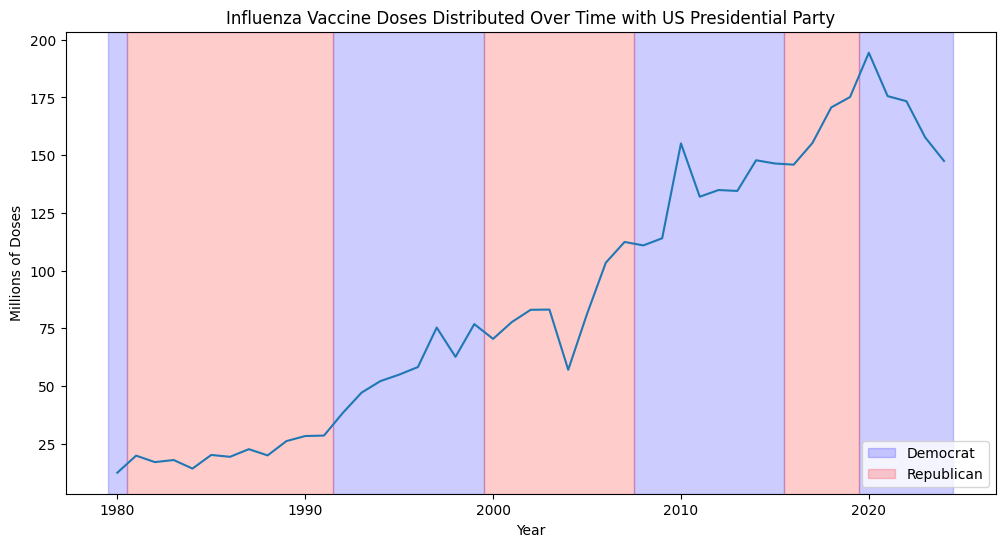

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Load the merged influenza data
merged_influenza_df = pd.read_csv("/content/merged_influenza_presidents_data.csv")

fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(data=merged_influenza_df, x='year', y='Millions of Doses', ax=ax)

party_groups_influenza = merged_influenza_df.groupby('party')['year'].apply(list).to_dict()

for party, years in party_groups_influenza.items():
    color = 'blue' if party == 'Democrat' else 'red'
    years.sort()
    start_year = years[0]
    end_year = years[0]
    for i in range(1, len(years)):
        if years[i] == end_year + 1:
            end_year = years[i]
        else:
            ax.axvspan(start_year - 0.5, end_year + 0.5, color=color, alpha=0.2)
            start_year = years[i]
            end_year = years[i]
    ax.axvspan(start_year - 0.5, end_year + 0.5, color=color, alpha=0.2)


ax.set_title('Influenza Vaccine Doses Distributed Over Time with US Presidential Party')
ax.set_xlabel('Year')
ax.set_ylabel('Millions of Doses')

democrat_patch = mpatches.Patch(color='blue', alpha=0.2, label='Democrat')
republican_patch = mpatches.Patch(color='red', alpha=0.2, label='Republican')
ax.legend(handles=[democrat_patch, republican_patch])

plt.show()